In [2]:
import  numpy as np
import matplotlib.pyplot as plt
import cv2

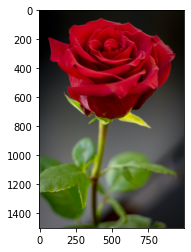

In [3]:
#Read in the image
image = cv2.imread('Rose.jpeg')

#Chnage color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# print(image.shape)

plt.imshow(image)

#Reshaping the image into a 2D array of pixels and 3 color values (RGB)
pixel_vals = image.reshape(-1, 3)
# print(pixel_vals.shape)
#Convert to float
pixel_vals = np.float32(pixel_vals)

# New Section

[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]
[[ 37  28  19]
 [163   7  27]
 [ 98 109  75]]
[[37 28 19]
 [37 28 19]
 [37 28 19]
 ...
 [37 28 19]
 [37 28 19]
 [37 28 19]]


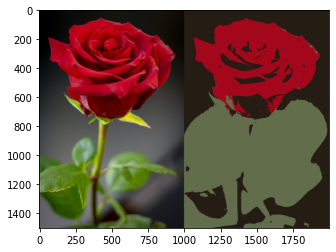

In [4]:
#the below line of code defines the criteria for the algorithm to stop
#running, which will happen is 100 iterations are run or the epsilon
#are the  epsilon (which is the required accuracy)
#becomes 85%

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.01)

#then perform k-means clustering with h number of clusters defined as 3
#also random centers are initially chosed for k-means clustering
k=3
retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
print(labels)

#convert data into 8-bit values
centers = np.uint8(centers)
print(centers)

segmented_data = centers[labels.flatten()]
print(segmented_data)

#reshape data into the original image dimensions
# segmented_data = segmented_data.reshape((image.shape))

segmented_image = segmented_data.reshape((image.shape))

numpy_horizontal_concat = np.concatenate((image, segmented_image), axis=1)
plt.imshow(numpy_horizontal_concat)